### 연습 문제 3.4.1
Numpy를 사용하여 다음 행렬을 특잇값 분해를 한다. (축소형이 아닌 방법과 축소형 방법을 각각 사용한다.) 또한 곱해서 원래의 행렬이 나오는 것을 보여라.

In [1]:
from numpy.linalg import svd

In [3]:
B = np.array([[3,2,2,],[2,3,-2]])
U, S, VT = svd(B)
U2, S2, VT2 = svd(B, full_matrices=False)

In [14]:
U, S, VT

(array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]),
 array([5., 3.]),
 array([[ 7.07106781e-01,  7.07106781e-01,  3.88578059e-16],
        [-2.35702260e-01,  2.35702260e-01, -9.42809042e-01],
        [-6.66666667e-01,  6.66666667e-01,  3.33333333e-01]]))

In [30]:
U @ np.diag(S, 2)[:2, 1:] @ VT

array([[ 0.58088023, -0.58088023, -4.04044011],
       [-2.2475469 ,  2.2475469 , -2.62622655]])

In [20]:
U2 @ np.diag(S2) @ VT2

array([[ 3.,  2.,  2.],
       [ 2.,  3., -2.]])

### 연습문제 3.5.1 
붓꽃 데이터 중 앞에서 50개의 데이터에 대해 다음 문제를 풀어라
- (2) 꽃받침 길이와 폭, 꽃잎 길이와 폭, 이 4가지 변수를 모두 사용하여 1차원 PCA를 수행하라. 꽃의 크기는 관측 데이터의 어떤 선형조합을 나타나는가?

In [8]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
%matplotlib inline

ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (2).

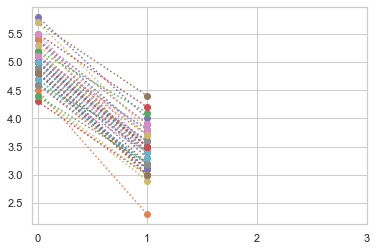

In [9]:
iris = load_iris()
N = 50  # 앞의 10송이만 선택
X = iris.data[:N, :2]  # 꽃받침 길이와 꽃받침 폭만 선택
plt.plot(X.T, 'o:')
plt.xticks(range(4), ["꽃받침 길이", "꽃받침 폭"])
plt.xlim(-0.5, 2)
plt.ylim(2.5, 6)
plt.title("붓꽃 크기 특성")
plt.legend(["표본 {}".format(i + 1) for i in range(N)])
plt.show()

In [6]:
pcal = PCA(n_components=1)
X_low = pcal.fit_transform(X)
X2 = pcal.inverse_transform(X_low)

plt.figure(figsize=(7, 7))
ax = sns.scatterplot(0,1, data=pd.DataFrame(X), s=100, color='.2',markers='s')
pca1 = PCA(n_components=1)
X_low = pca1.fit_transform(X)
X2 = pca1.inverse_transform(X_low)

plt.figure(figsize=(7, 7))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")
for i in range(N):
    d = 0.03 if X[i, 1] > X2[i, 1] else -0.04
    ax.text(X[i, 0] - 0.065, X[i, 1] + d, "표본 {}".format(i + 1))
    plt.plot([X[i, 0], X2[i, 0]], [X[i, 1], X2[i, 1]], "k--")
plt.plot(X2[:, 0], X2[:, 1], "o-", markersize=10)
plt.plot(X[:, 0].mean(), X[:, 1].mean(), markersize=10, marker="D")
plt.axvline(X[:, 0].mean(), c='r')
plt.axhline(X[:, 1].mean(), c='r')
plt.grid(False)
plt.xlabel("꽃받침 길이")
plt.ylabel("꽃받침 폭")
plt.title("Iris 데이터의 1차원 차원축소")
plt.axis("equal")
plt.show()

TypeError: object of type 'int' has no len()